**ACCESSING FOLDER**

import sys, os, datetime
import matplotlib.pyplot as plt
os.chdir("D:\\10XAcademy\\Ad-campaign-performance")
path_to_module = os.path.abspath(os.getcwd()+"\\scripts")
if path_to_module not in sys.path:
    sys.path.append(path_to_module)

In [48]:
import sys, os, datetime
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
import extract_dataframe
import plots_data

In [24]:
# TODO: add your own path and change my_path variable before running your code 
janerose ="D:\\10XAcademy\\Ad-campaign-performance" 
egide = "C:\\Users\Kamuzinzi N. Egide\\Documents\\Ten_academy\\week 2\\Ad-campaign-performance"
my_path = janerose
# my_path = egide
os.chdir(my_path)
path_to_module = os.path.abspath(os.getcwd()+"\\scripts")
if path_to_module not in sys.path:
    sys.path.append(path_to_module)

**OBTAINING DATAFRAME FROM CSV FILE**

In [46]:
df = extract_dataframe.read_csv_file(os.getcwd()+"\\data\\AdSmartABdata.csv")
ed = extract_dataframe.ExtractDataframe(df)

**DATAFRAME PROPERTIES**

*<u>1) Sample Dataframe Values</u>*

In [39]:
ed.dataframe.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


*<u>2) Dataframe Information</u>*

In [40]:
ed.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 410.2+ KB


*<u>3) Null values</u>*

In [41]:
ed.dataframe.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

*No NaN values in dataset*

*<u>4) Checking for duplicates</u>*

In [42]:
ed.dataframe[ed.dataframe.duplicated()]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


*No duplicate values in any of the rows in the dataset*

*<u>5) Dataframe shape</u>*

In [43]:
ed.dataframe.shape

(8077, 9)

**EXPLORATORY DATA ANALYSIS**

*1) Correlation = how much each variable or feature is related*

In [44]:
ed.dataframe.corr()

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


*<u>2) Data Aggregation</u>*

*<u>i) How many online users in each experiment group replied yes or no in the BIO questionnaire*</u> 

In [45]:
ed.get_online_user_reply(ed.dataframe,"experiment")

,yes,no
experiment,,
exposed,308,349
control,264,322


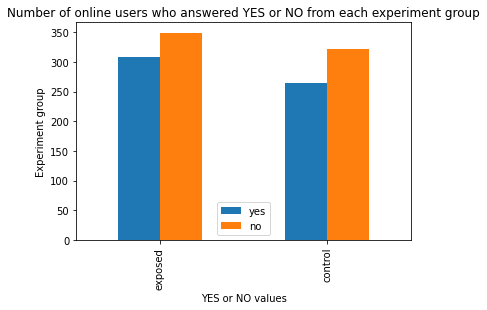

In [52]:
col ="experiment"
ylabel = "Experiment group"
xlabel = "YES or NO values"
title = "Number of online users who answered YES or NO from each experiment group"
plots_data.plot_unstacked_bar(ed.get_online_user_reply(ed.dataframe,"experiment"),title, xlabel, ylabel) 

*<u>ii) Correlation between YES or NO replies and other features</u>*

In [53]:
ed.get_online_user_reply(ed.dataframe,"browser")

,yes,no
browser,,
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Facebook,69,87
Samsung Internet,67,78
Mobile Safari,4,10
Chrome,1,1
Chrome Mobile iOS,1,0
Mobile Safari UI/WKWebView,0,3
Android,0,0


In [67]:
ed.get_online_user_reply(ed.dataframe,"device_make")

,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


In [54]:
ed.get_online_user_reply(ed.dataframe,"platform_os")

,yes,no
platform_os,,
6,567,659
5,5,12
7,0,0


In [69]:
ed.get_online_user_reply(ed.dataframe,"hour")

,yes,no
hour,,
15,126,155
8,31,36
6,29,21
9,28,29
10,26,31
20,26,19
16,24,20
7,23,36
13,23,18


In [55]:
ed.get_online_user_reply(ed.dataframe,"date")

,yes,no
date,,
2020-07-03,147,178
2020-07-09,85,99
2020-07-08,85,92
2020-07-04,76,83
2020-07-10,54,70
2020-07-05,52,65
2020-07-07,38,45
2020-07-06,35,39


**TASK 1.1:**

*<u>Online users that belong to control experiment group</u>*

In [56]:
ed.get_rows("experiment","control")

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


*Save control group as csv file*

In [57]:
extract_dataframe.save_as_csv(ed.get_rows("experiment","control"),os.getcwd()+"\\data\\control_group_data.csv")

*Percentage of online users in control group*

In [58]:
print(f"The number of online users in the control group is {round(ed.dataframe[ed.dataframe['experiment'] =='control']['auction_id'].nunique(),2)} which represents {round(ed.dataframe[ed.dataframe['experiment'] == 'control']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}% of the online users in the experiment")

The number of online users in the control group is 4071 which represents 50.4% of the online users in the experiment


*<u>Online users that belong to exposed experiment group</u>*

In [59]:
ed.get_rows("experiment","exposed")

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


*Save exposed group as csv file*

In [60]:
extract_dataframe.save_as_csv(ed.get_rows("experiment","control"),os.getcwd()+"\\data\\exposed_clean_data.csv")

*Percentage of online users in exposed group*

In [61]:
print(f"The number of online users in the exposed group is {round(ed.dataframe[ed.dataframe['experiment'] == 'exposed']['auction_id'].nunique())} which represents {round(ed.dataframe[ed.dataframe['experiment'] == 'exposed']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}% of the online users in the experiment")

The number of online users in the exposed group is 4006 which represents 49.6% of the online users in the experiment


*<u>Number of Unique values in each categorical variable</u>*

In [62]:
ed.get_unique_categories(ed.dataframe)

auction_id     8077
experiment        2
date              8
device_make     270
browser          15
dtype: int64

*<u>Duration of the experiment</u>*

In [63]:
start_date = datetime.datetime.strptime(ed.dataframe['date'].min(), '%Y-%m-%d')
ending_time = datetime.datetime.strptime(ed.dataframe['date'].max(), '%Y-%m-%d')
duration_date = (ending_time - start_date).days
print(f"The experiment ran for {duration_date} days")

The experiment ran for 7 days
